In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, gamma

# Probability Theory for Thermal Physics

```{admonition} Relevant readings and preparation
:class: reading

- Concepts in Thermal Physics: Chapter 3: 3.1-3.8: pg. 20-28

```{admonition} Learning outcomes:
:class: outcomes
- Distinguish between **discrete** and **continuous** probability distributions.
- Define and calculate the **variance** and **standard deviation** of a distribution.
- Understand how **linear transformations** affect the mean and variance of a random variable.
- Describe the properties and applications of the **binomial distribution** in modelling discrete physical events.
- Recognise the difference between **independent** and **dependent** probabilities.
- Apply **Bayes’ theorem** to update parameters of probability distributions in response to new information.
- Identify and use the **normal (Gaussian) distribution** as an approximation to many natural phenomena.
- Describe the **Poisson distribution** and its relevance to counting statistics and random thermal events.

Reality is filled with uncertainty. Every action or decision we take must be made with incomplete information, since the chain of events leading to an outcome is often so complex that the exact result is unpredictable. Nevertheless, we can still act with quantifiable confidence in an uncertain world. Incomplete information is better than none at all, for example - it is more useful to know that there is a 20% chance of rain tomorrow than to have no forecast whatsoever. Probability is the mathematical framework that allows us to quantify uncertainty, and it is ubiquitous across all fields of scientific study, alongside finance sectors, software development, politics and so forth.


Probability theory has had an undeniably strong impact in furthering our understanding of thermal physics. This is because we often study systems containing a practically uncountable number of particles, where individual atomic behaviour is unpredictable but collective behaviour is remarkably regular. On macroscopic scales, probabilistic predictions become suitably precise. Measureable quantities such as temperature or pressure emerge as averages over many atomic contribtions. Although each atom behaves differently, and tracking all atoms' individual motions and collisions is an unfeasible feat, the ensemble's average behaviour follows well-defined probability distribitions, allowing us to perceive and model system behaviour without complete knowledge.


Before we delve into the basics of probability theory, we establish a few definitions:

- Probabilities are non-negative numbers which take values between 0 and 1.

- For a given scenario, all possible outcomes of that scenario form a set of events, with each outcome having an associated probability.

- If an outcome is not part of this set, its probability of occurring is zero.

- If the event is certain, the probability of it occurring is one.

- Events are considered 'mutually exclusive' if they cannot occur simultaneously.

- The sum of probabilities for all mutually exclusive outcomes must equal one for a valid probability distribution.

## Discrete and Continuous probability distributions

### Discrete Distributions

**Discrete random variables** can only take values from a finite or countable set. A classic example is a six-sided die, whose outcomes are {1, 2, 3, 4, 5, 6}. If we denote $x$ as a discrete random variable that takes values $x_i$ with corresponding probabilities $P_i$, we can define several useful quantities that describe its behaviour.

First, we require that the probabilities of all outcomes must add up to one:

$$
\sum_{i} P_{i} = 1.
\tag{1}
$$

The arithmetic mean, or expected value, is defined as:

$$
\langle x \rangle = \sum_i x_i P_i.
\tag{2}
$$

Intuitively, the idea is that for each outcome contributes to the sum in proportion to how likely it is to occur. This is called *weighting*. If you were to sample the random variable many times, add up all the observed values, and divide by the number of trials, the result would converge to the expected value. We may also define the "mean squared" value:

$$
\langle x^2 \rangle = \sum_i x_i^2 P_i.
\tag{3}
$$

Discrete distributions arise in many areas of thermal and statistical physics. Examples include:
- the amount of molecular collisions in a gas during a fixed time interval,
- the number of radioactive decay events detected by a sensor,
- the number of collision required before a molecule transfers its energy,
- the distribution of energies in systems with discrete energy levels,
- the probability of transmission or reflection when a particle encounters a barrier,
- particle velocities and energies in a simulated setting, where values are stored in bins.

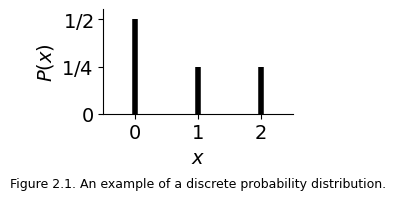

In [3]:
# Example of 3-valued discrete probability distribution.
if True:
    # Discrete values of x and corresponding probabilities
    x = np.array([0, 1, 2])
    P = np.array([1/2, 1/4, 1/4])

    # Create figure
    plt.figure(figsize=(3, 2))

    # Plot as vertical lines
    plt.vlines(x, 0, P, colors='k', lw=4)

    # Axis labels
    plt.xlabel(r"$x$")
    plt.ylabel(r"$P(x)$")

    # Set axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(0, 0.55)

    # Tick positions - relabelling y-axis tick markers.
    plt.xticks([0, 1, 2])
    plt.yticks([0, 0.25, 0.5], [r"$0$", r"$1/4$", r"$1/2$"])

    # Remove top/right spines
    for spine in ['top', 'right']:
        plt.gca().spines[spine].set_visible(False)

    # Add caption
    plt.figtext(0.5, -0.6,
         "Figure 2.1. An example of a discrete probability distribution.",
         ha='center', va='top', fontsize=9, transform=plt.gca().transAxes
    )

    # comment.txt.jpg.html
    plt.tight_layout()
    plt.show()

Note that the expected value need not be present in the set of outcomes. A common example of this is the average number of children a family is expected to have across a population. These figures are often cited to occur between 1.8-2.4, yet it is only possible to have an integer number of children. These impossible values only make sense when considering a population rather than an individual sample.

```{admonition} Example: Expected value and mean squared
:class: example
Consider a scenario where random variable $x$ can take values {0, 1, 2} with corresponding probabilities {$\frac{1}{2}$, $\frac{1}{4}$, $\frac{1}{4}$}. This distribution is visualised in figure 2.1. Calculate the expected value for

- (a) the variable, $\langle x \rangle$
- (b) the mean squared of the variable, $\langle x^2 \rangle$.

## (a)

First check that $\sum P_i = 1$. Since $\frac{1}{2} + \frac{1}{4} + \frac{1}{4} = 1$ we are good to go. We then calculate the averages as follows:

$$
\begin{align*}
\langle x \rangle &= \sum_i x_i P_i \\
&= 0 \cdot \tfrac{1}{2} + 1 \cdot \tfrac{1}{4} + 2 \cdot \tfrac{1}{4} \\
&= \tfrac{3}{4} = 0.75
\end{align*}
$$

We see that the mean $\langle x \rangle$ is not one of the possible values $x$ can take. 

## (b)

We follow a similar process for $\langle x^2 \rangle$:

$$
\begin{align*}
\langle x \rangle &= \sum_i x_i P_i \\
&= 0^2 \cdot \tfrac{1}{2} + 1^2 \cdot \tfrac{1}{4} + 2^2 \cdot \tfrac{1}{4} \\
&= 0 \cdot \tfrac{1}{2} + 1 \cdot \tfrac{1}{4} + 4 \cdot \tfrac{1}{4} \\
&= \tfrac{5}{4} = 1.25
\end{align*}
$$
```

### Continuous distributions

Let $x$ now be a **continuous random variable**, meaning it can take any value within some range (the bounds may be finite or infinite). We must treat probabilities differently in this case. Imagine a uniform distribution between 1 and 10: one sample might give an exact value like 4, another could be something extremely specific like 3.14159265... Because there are infinitely many possible values, the probability of landing on any one exact value is effectively zero. Instead, we talk about the probability of $x$ lying within a small interval of width $dx$.

Many real-life quantities are described by continuous distributions. For example, height, commute durations, and local temperature all vary smoothly within finite limits, even if the exact value can be anything within the range. As before, the total probability must sum to one, but because we are now summing over a continuous range, we replace sums with integrals:

$$\int P(x)dx = 1.$$

We have analogous expressions for $\langle x \rangle$ and $\langle x^2 \rangle$:

$$\langle x \rangle = \int x P(x)dx;$$
$$\langle x^2 \rangle = \int x^2 P(x)dx.$$

Continuous random variables are extremely common in thermal physics and statistical mechanics. Typical scenarios include:
- particle speeds in a gas,
- particle energies in a classical system,
- waiting times between molecular collision events,
- spatial fields such as pressure, density and temperature,
- radiation intensity as a function of frequency.

```{admonition} Uniform Distribution on [0, 10]
:class: example

Let a continuous random variable $x$ be uniformly distributed between 0 and 10:

$$ P(x) = 
\begin{cases}
    \frac{1}{10}, & 0 \le x \le 10, \\
    0, & \text{otherwise.}
\end{cases}
$$

What is the values of

- (a) the expected value $\langle x \rangle$?
- (b) the mean squared value $\langle x^2 \rangle$?


First, ensure that $P(x)$ is a valid probability distribution by checking that it is normalised:

$$
\int_0^{10} P(x) \, dx = \int_0^{10} \frac{1}{10} \, dx = \left[\frac{x}{10}\right]^{10}_{0} = 1.
$$

We can then compute the expected values:

## (a)

$$
\begin{align*}
\langle x \rangle &= \int_0^{10} x P(x) \, dx = \frac{1}{10} \int_0^{10} x \, dx = \frac{1}{10} \left[\frac{x^2}{2}\right]_0^{10} = 5, \\[6pt]
\end{align*}
$$

## (b)

$$
\begin{align*}
\langle x^2 \rangle &= \int_0^{10} x^2 P(x) \, dx = \frac{1}{10} \int_0^{10} x^2 \, dx = \frac{1}{10} \left[\frac{x^3}{3}\right]_0^{10} = \frac{100}{3} \approx 33.33.
\end{align*}
$$

The mean of 5 lies exactly halfway between the bounds, which is as you'd expected for a symmetric uniform distribution.
```


```{admonition} Exponential Lifetime Distribution
:class: example

Now consider a physical system whose lifetime follows an exponential distribution, such as the lifetime of a radioactive nucleus. The probability density of its lifetime is given by

$$
P(t) =
\begin{cases}
\lambda e^{-\lambda t}, & t \ge 0, \\
0, & t < 0,
\end{cases}
$$

where $\lambda$ is the decay rate constant. Calculate for this distribution:

- (a) $\langle t \rangle$
- (b) $\langle t^2 \rangle$

## (a)

First, confirm normalisation:

$$
\int_0^{\infty} P(t) \, dt = \int_0^{\infty} \lambda e^{-\lambda t} \, dt =
\lambda \left[-\frac{1}{\lambda} e^{-\lambda t}\right]^{\infty}_0 = \left[-e^{-\lambda t}\right]_0^{\infty} = 1.
$$

Then compute the averages:

$$
\begin{align*}
\langle t \rangle &= \int_0^{\infty} t P(t) \, dt = \lambda \int_0^{\infty} t e^{-\lambda t} \, dt = \frac{1}{\lambda}, \\[6pt]
\end{align*}
$$

## (b)
$$
\begin{align*}
\langle t^2 \rangle &= \int_0^{\infty} t^2 P(t) \, dt = \lambda \int_0^{\infty} t^2 e^{-\lambda t} \, dt = \frac{2}{\lambda^2}.
\end{align*}
$$

For an exponential lifetime distribution, the mean value $\langle t \rangle = 1/\lambda$ has a direct physical interpretation: it is the **average lifetime** of the system. In radioactive decay, this corresponds to the characteristic time after which only about $1/e$ of the original nuclei remain. It is closely related to experimentally measurable quantities such as the half-life.

The second moment $\langle t^2 \rangle$ tells us about the **spread of possible lifetimes**. Combining these results gives the variance, computed via the difference between $\langle t^2 \rangle$ and $\langle t \rangle$:

$$
\sigma_t^2 = \langle t^2 \rangle - \langle t \rangle^2 = \frac{1}{\lambda^2},
$$

which means the standard deviation is equal to the mean:

$$
\sigma_t = \langle t \rangle = \frac{1}{\lambda}.
$$

This is a distinctive property of exponential decay: the uncertainty in the lifetime is as large as the lifetime itself. Physically, this tells us that individual decay events are highly unpredictable, even though the *average behaviour* of a large population is very regular and follows an exact exponential law. This contrast between noisy individual lifetimes and smooth ensemble behaviour is one of the central ideas of statistical physics.


## Measures of Central Tendencies

When describing a probability distribution, we often want to identify simple central values which best represent the properties and sampling behaviour of a probability distribution. These are known as **measures of central tendency**, and the most common are the **mean**, **median**, and **mode**:

- **Mean** ⟨x⟩: the expectation or average value of a distribution.
- **Median**: the value that divides the distribution into two equal halves, i,e. the middle value.
- **Mode**: the most probable value, where the probability is maximal.

For symmetric distributions (like the Gaussian), these three measures coincide onto the same value. For asymmetric or skewed distributions, they differ, and thus provide valuable information for characterising a distribution. In general, thermal systems contain huge numbers of particles, so we typically describe their behaviour statistically rather than tracking each particle individually to discern collective behaviour. Measures of central tendency, the mean, median and mode, each give us simple summary values which capture the typical behaviour of a distribution. In the context of thermal physics, these quantities help us understand average energies, particle speeds, and the way these fluctuations cluster around specific values. They can also be useful in that they help us distinguish when system exhibit symmetric behaviour, as is the case when all three measures are in agreement, i.e. $\text{mean} = \text{median} = \text{mode}$, or when they exhibit strong asymmetry.

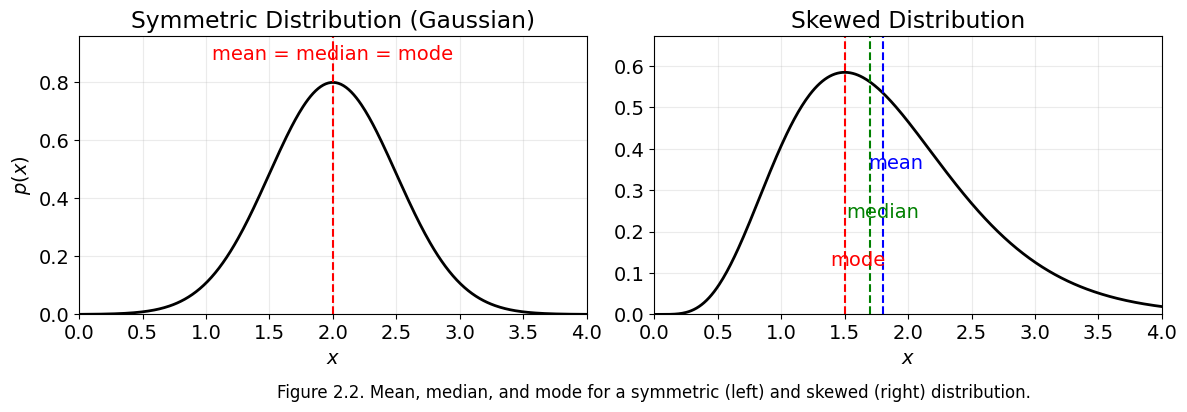

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# =========================================
# LEFT PANEL — SYMMETRIC GAUSSIAN
# =========================================

x = np.linspace(0, 4, 400)
mu, sigma = 2, 0.5
y = norm.pdf(x, mu, sigma)

axs[0].plot(x, y, color='k', linewidth=2)

axs[0].axvline(mu, color='r', linestyle='--', linewidth=1.5)

# Place text slightly above the curve — ~10% above curve maximum
axs[0].text(mu, max(y)*1.08,
            "mean = median = mode",
            color='r',
            ha='center', va='bottom')

axs[0].set_xlim(0, 4)
axs[0].set_ylim(0, max(y)*1.2)
axs[0].set_title("Symmetric Distribution (Gaussian)")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$p(x)$")
axs[0].grid(alpha=0.25)


# =========================================
# RIGHT PANEL — SKEWED (GAMMA)
# =========================================

shape = 6
scale = 0.3
x2 = np.linspace(0, 4, 400)
y2 = gamma.pdf(x2, a=shape, scale=scale)

mode   = (shape - 1) * scale
mean   = shape * scale
median = gamma.median(shape, scale=scale)

axs[1].plot(x2, y2, color='k', linewidth=2)

axs[1].axvline(mode,   color='r', linestyle='--', linewidth=1.5)
axs[1].axvline(median, color='g', linestyle='--', linewidth=1.5)
axs[1].axvline(mean,   color='b', linestyle='--', linewidth=1.5)

axs[1].text(mode+0.1,   max(y2)*0.2, "mode",   color='r', ha='center')
axs[1].text(median+0.1, max(y2)*0.4, "median", color='g', ha='center')
axs[1].text(mean+0.1,   max(y2)*0.6, "mean",   color='b', ha='center')

axs[1].set_xlim(0, 4)
axs[1].set_ylim(0, max(y2)*1.15)
axs[1].set_title("Skewed Distribution")
axs[1].set_xlabel("$x$")
axs[1].grid(alpha=0.25)

plt.figtext(0.0, -0.25,
         "Figure 2.2. Mean, median, and mode for a symmetric (left) and skewed (right) distribution.",
         ha='center', va='top', fontsize=12, transform=plt.gca().transAxes
)

plt.tight_layout()
plt.show()

While many distributions in thermodynamics are symmetric, like the Gaussian and Binomial distributions commonplace throughout physics, real physical scenarios can often produce assymetrically distributed systems. For example, particle speeds in a gas, or waiting times between detection events are typically not symmetrically distributed. The skewed plot highlights how the mean, median and mode can differ significantly, and illustrates why we cannot rely on just one of these measures when interpretic assymetrically distributed data. In skewed distributions, the mean is pulled towards the distribution's tail, whilst the median moves between the mean and mode. Regardless, the mode still represents the most probable value, i.e. it is situated at the peak of the distribution.

### Expectations of a function

As we learned in the section on discrete and continuous distributions, the expectation value computes the arithmetic mean of a distribution $P(x)$, with respect to an arbitrary function, $f(x)$, which may simply be the variable itself, i.e. $x$:

$$
\langle f(X) \rangle =
\begin{cases}
\displaystyle \sum_i f(x_i)P(x_i), & \text{discrete}\\[6pt]
\displaystyle \int_{-\infty}^{\infty} f(x)p(x)\,dx, & \text{continuous}
\end{cases}
$$

Notably, the expected value of a constant is merely itself. Since it's probability of occurance is 1. For a given constant $A$:

$$
\begin{align}
A
&= \sum_i A_i \cdot P(A_i) \\
&= A \cdot P(A) \\
&= A \cdot 1 \\
&= A
\end{align}
$$


### Variance

The **variance** measures the average deviation of values around the mean of a distribution and is always positive. It is defined as follows:

$$
\mathrm{Var}(X) = \langle (x-⟨x⟩)^2 \rangle
$$

We can expand the above expression to derive a simpler expression for calculating the variance of a scalar variable:

$$
\begin{aligned}
\mathrm{Var}(x)
&= \langle (x - ⟨x⟩)^2 \rangle \\
&= \langle x^2 - 2⟨x⟩x + ⟨x⟩^2 \rangle \\
&= \langle x^2 \rangle - 2⟨x⟩⟨x⟩ + ⟨x⟩^2 \\
&= \langle x^2 \rangle - ⟨x⟩^2.
\end{aligned}.
$$

This manner of expressing the variance gives rise to a mnemonic expression with which you can memorise the formula: The variance is "the mean of the squares minus the square of the means." The variance for a variable $x$ is often denoted $\sigma^2_x$, and relates to the **standard deviation**, which is simply the square root of the variance:

$$
\sigma_x = \sqrt{\left\langle (x - \langle x \rangle)^2 \right\rangle}
= \sqrt{\,\langle x^2 \rangle - \langle x \rangle^2\,}
$$


## Linear Transformations

A linear transformation is a mathematical rule which maps one variable to another through scaling and shifting. The genera form is $y = ax + b$. The constant $a$ controls how much the values are stretched $(a > 1)$ or compressed $(a < 1)$, and $b$ controls how much they are shifted up $(b > 1)$ or down $(b < 1)$. Many everyday unit conversions, such as inches to centimeters or Celcius to Kelvin, are examples of linear transformation.

```{admonition} Example: Inches to centimetres
:class: example

The conversion from inches to centimetres, or vice versa, is a linear transformation. If we take $x$ to be inches, then to find the value $y$ centimetres, we simply use the scale factor of $a=2.54$ inches per centimeter and an intercept $b=0$: 

$$y\ \text{in} = x\ \text{cm} \times a + b = 2.54\ x\ \text{in} + 0$$

```

<!-- stef: probably don't need 3 examples for linear transformations do we? plus these are covered in the next section
- Converting **Celsius to Kelvin**: $T_K = T_C + 273.15$ → shift only ($a = 1$, $b = 273.15$).
- Converting **Celcius to Fareneheit**: $T_F = (T_C \times 1.8) + 32$ → scale and shift ($a = 1.8$, $b = 32$). -->

### Expectation under a linear transformation

Because the expectation operator $\langle \cdot \rangle$ is linear, the mean of a transformed variable follows the transformation directly. Scaling random variable $x$ by $a$ and shifting by $b$ means the average value is also scaled by $a$ and shifted by $b$:

$$
\langle y \rangle = \langle ax \ + \ b \rangle = a \langle x \rangle \ + \ b
$$

A constant (i.e. $b$) merely contributes its own value to the expectation, and constant factors (i.e. $a$) simply pass through the expectation operator. The full process of calculating $\langle y \rangle$ following its production through the linear transformation $y = ax+b$ is as follows:

$$
\begin{aligned}
\langle y \rangle
&= \langle a x + b \rangle \\[6pt]
&= \langle a x \rangle + \langle b \rangle \\[6pt]
&= \langle a \rangle\,\langle x \rangle + \langle b \rangle \\[6pt]
&= a\,\langle x \rangle + b
\end{aligned}
$$

### Variance under a linear transformation

Variance behaves slightly differently. Shifting by $b$ has no effect, because moving a distribution left or right does not change its spread. Scaling by $a$ however does stretch/compress the distribution, manifesting as a squared scaling of the variance. For a variable $x$ transformed linearly via $y = a x + b$:

Starting with the standard definition of the variance:

$$
\mathrm{Var}(y) = \langle (y - \langle y \rangle)^2 \rangle
$$

and substituting $y = a x + b$,

$$
\begin{aligned}
\mathrm{Var}(y)
&= \left\langle (ax + b - \langle ax + b \rangle)^2 \right\rangle \\[4pt]
&= \left\langle (ax + b - (a\langle x \rangle + b))^2 \right\rangle \\[4pt]
&= \left\langle (a(x - \langle x \rangle))^2 \right\rangle \\[4pt]
&= a^2\,\left\langle (x - \langle x \rangle)^2 \right\rangle \\[4pt]
&= a^2\,\mathrm{Var}(x)
\end{aligned}
$$

This is an important result for physics and measurement generally, as whenever a quantity is converted or calibrated using a linear relation, its uncertainty scales by the square of that factor.

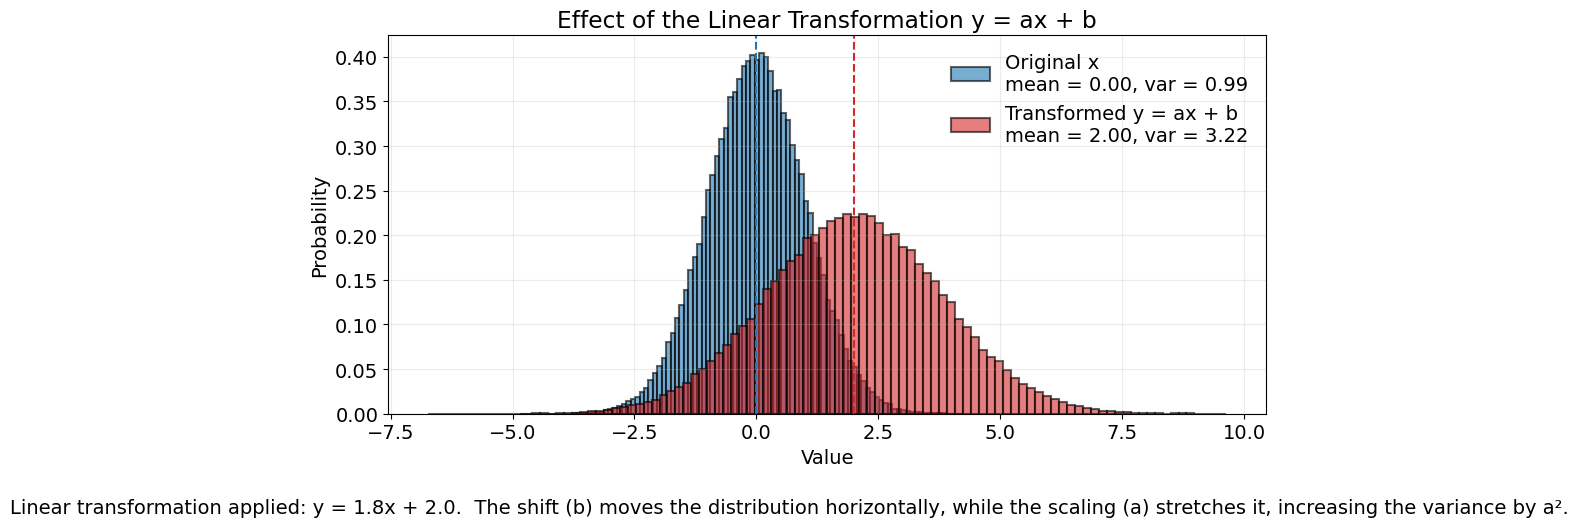

In [51]:
# Data
np.random.seed(0)
x = np.random.normal(0, 1, 100000)

# Linear transform params
a = 1.8
b = 2.0
y = a * x + b

# Means/variances
mean_x, var_x = np.mean(x), np.var(x)
mean_y, var_y = np.mean(y), np.var(y)

fig, ax = plt.subplots(figsize=(10, 5))

# -------------------------
# Original distribution
# -------------------------
ax.hist(
    x, bins=100,
    density=True,
    alpha=0.6,
    color='tab:blue',
    edgecolor='black',
    label=f"Original x\nmean = {mean_x:.2f}, var = {var_x:.2f}"
)
ax.axvline(mean_x, color='tab:blue', linestyle='--', linewidth=1.5)

# -------------------------
# Transformed distribution
# -------------------------
ax.hist(
    y, bins=100,
    density=True,
    alpha=0.6,
    color='tab:red',
    edgecolor='black',
    label=f"Transformed y = ax + b\nmean = {mean_y:.2f}, var = {var_y:.2f}"
)
ax.axvline(mean_y, color='tab:red', linestyle='--', linewidth=1.5)

# Labels
ax.set_xlabel("Value")
ax.set_ylabel("Probability")
ax.set_title("Effect of the Linear Transformation y = ax + b")
ax.legend(frameon=False)
ax.grid(alpha=0.25)

# -------------------------
# Caption
# -------------------------
plt.figtext(
    0.5, -0.05,
    f"Linear transformation applied: y = {a}x + {b}.  "
    "The shift (b) moves the distribution horizontally, "
    "while the scaling (a) stretches it, increasing the variance by a².",
    ha='center'
)

plt.tight_layout()
plt.show()

## Independent Variables in Probability

In many physical problems we work with more than one random variable. For example, a molecule has both a position and a velocity, and repeated measurements of the same quantity each produce different outcomes. Sometimes these variables are **independent**, meaning that knowing the value of one does not provide any information about the other. A simple example is coin tossing: knowing the result of one flip does not influence the next.

Formally, two random variables $u$ and $v$ are *independent* if their joint probability distribution factorises into a product series of each variable's marginal distribution:

$$
P(u, v) = P_u(u)\,P_v(v).
$$

If this holds, the value observed for $u$ has no bearing on $v$, and vice versa. This generalises to any number of independent variables. If $\vec{x} = (x_1, x_2, \ldots, x_N)$ has each component independent of the other, then

$$
P(\vec{x}) = \prod_{i=1}^{N} P_i(x_i).
$$


A very useful consequence of independence is that the expectation of a product factorises:

$$
\begin{aligned}
\langle uv \rangle
  &= \int\!\!\int uv\,P_u(u)\,P_v(v)\,du\,dv \\[6pt]
  &= \left( \int u\,P_u(u)\,du \right)
     \left( \int v\,P_v(v)\,dv \right) \\[6pt]
  &= \langle u \rangle \,\langle v \rangle.
\end{aligned}
$$

The same reasoning extends directly to $N$ independent variables:

$$
\begin{aligned}
\left\langle \prod_{i=1}^N X_i \right\rangle
  &= \int \cdots \int
     \left( \prod_{i=1}^N x_i \right)
     \left( \prod_{i=1}^N p_i(x_i) \right)
     dx_1\cdots dx_N \\[6pt]
  &= \prod_{i=1}^N \left( \int x_i\, p_i(x_i)\,dx_i \right) \\[6pt]
  &= \prod_{i=1}^N \langle X_i \rangle.
\end{aligned}
$$

This result holds for discrete variables as well: simply replace the integrals within the series with sums.

```{admonition} Example: Mean and variance
:class: example

Suppose that there are $n$ independent variables, $X_i$, each with the same mean $\langle X \rangle$ and variance $\sigma^2_X$. Let $Y$ be the sum of the random variables, such that $Y = X_1 + X_2 \ + \ ... \ + \ X_n$. Find 

- (a) the mean of Y
- (b) the variance of Y

## (a)

The mean of $Y$ is simply the sum of each variable's expectation value. As each variable $X_i$ has the same mean $\langle X \rangle$, we have:

$$
\langle Y \rangle = n \langle X \rangle.
$$

## (b)

Finding the variance of $Y$ is a marginally more complicated matter. To start, let's refer to the formula $\sigma^2_Y = \langle Y^2 \rangle - \langle Y \rangle^2$. Seeing as we have $\langle Y \rangle^2 = n^2 \langle X \rangle^2$, we only need to calculate $\langle Y^2 \rangle$:

$$
\begin{align}
\langle Y^{2} \rangle
  &= \langle X_{1}^{2} + \cdots + X_{N}^{2} + X_{1}X_{2} + X_{2}X_{1}
     + X_{1}X_{3} + \cdots \rangle \tag{3.37} \\[6pt]
  &= \langle X_{1}^{2} \rangle + \cdots + \langle X_{N}^{2} \rangle
     + \langle X_{1}X_{2} \rangle + \langle X_{2}X_{1} \rangle
     + \langle X_{1}X_{3} \rangle + \cdots
\end{align}
$$

There are $n$ terms like $\langle X_1^2 \rangle$ on the right-hand side, and n(n-1) terms like $\langle X_1 X_2 \rangle$. The former takes the value $\langle X^2 \rangle$ and the latter $\langle X \rangle \langle X \rangle = \langle X \rangle^2$. Therefore:

$$
\langle Y^{2} \rangle = n\langle X^2 \rangle + n(n-1)\langle X \rangle^2,
$$

and,

$$
\begin{align}
\sigma_y^2
  &= \langle Y^2 \rangle - \langle Y \rangle^2 \\[6pt]
  &= n\langle X^2 \rangle + n(n-1)\langle X \rangle^2 - n^2\langle X \rangle^2 \\[6pt]
  &= n\langle X^2 \rangle + n^2\langle X \rangle^2 - n\langle X \rangle^2 - n^2\langle X \rangle^2 \\[6pt]
  &= n\langle X^2 \rangle - n\langle X \rangle^2 \\[6pt]
  &= n\!\left(\langle X^2 \rangle - \langle X \rangle^2\right) \\[6pt]
  &= n\sigma_X^2
\end{align}
$$

This tells us that if we make $n$ independent measurements of the same quantity, and then take their average via $Y/n$, the uncertainty in that average is reduced by a factor $\sqrt{n}$ compared to a single measurement:

$$
\sigma_{mean} = \frac{\sigma_x}{n}.
$$

## TODO - RMS needs elaboration, cite random walks and possibly Brownian motion.

This principle - that averaging many independent measurements reduces random error - underlies much of experimental physics. However, it is only applicable for random, uncorrelated errors. Any systematic bias in a measurement setup will persist regardless of repetitions. A related idea actually appears in the study of random walks; such as the motion of a particle buffeted by molecules in a fluid. Each step (period of motion) is independent of the last, so whilst the average displacement after many steps is zero, the root-mean-square displacement grows as $sqrt{n}$.

## The Binomial Distribution

<!-- stef: we've covered combinatorials in chapter 1, i'm going to hash this bit out for now
### Counting combinations
Before introducing the binomial distribution, it helps to recall some basic **combinatorics**—the mathematics of counting how many ways outcomes can be arranged.

Suppose you have *n* objects, and you want to choose *k* of them without caring about order in which they are selected.
The number of distinct selections, aka **combinations**, is:

$$
{n \choose k} = \frac{n! }{k! (n - k)! }
$$

where "! " denotes the factorial operation (e. g 5! = 5 × 4 × 3 × 2 × 1).
For example, there are ${4 \choose 2} = 6$ ways to pick 2 numbers from the set {1, 2 ,3 4}: (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4).

This quantity appears throughout probability theory because it counts how many different sequences can contain *k* particular outcomes (like *successes*) among *n* trials.

--- -->

Consider an experiment with only two possible outcomes, **success** and **failure**. This is called a **Bernoulli trial**.

- Let the probability of success be *p*.
- Then the probability of failure is (1 − *p*).

If we assign the value 1 to a success and 0 to a failure, the expectation and variance of a single trial are:

$$
\langle x \rangle = p, \qquad
\sigma_x^2 = p(1 - p)
$$

Now imagine performing $n$ independent Bernoulli trials; for example, flipping a coin $n$ times where we count $k$ heads. Let us consider "heads" as a success.

There are two ingredients to the probability of obtaining *k* successes:

1. **The probability of one specific sequence** with *k* successes and *n − k* failures:

 $$
 p^k (1 - p)^{n - k}
 $$

2. **The number of possible sequences** with exactly *k* successes:

 $$
 {n \choose k}
 $$

Multiplying these gives the **binomial probability** of observing *k* successes given *n* trials:

$$
P(n, k) = {n \choose k} p^k (1 - p)^{n - k}
$$

---

## Properties
From the definition, one can show that the probability of all combinations of successes and failures sums to unity:

$$
\sum_{k=0}^{n} P(n, k) = 1,
$$

so the probabilities are properly normalised.
The **mean** and **variance** of *k* are:

$$
\langle k \rangle = np, \qquad
\sigma_k^2 = np(1 - p)
$$

As *n* increases, both the mean and standard deviation grow, but the **fractional width**

$$
\frac{\sigma_k}{\langle k \rangle} =
\sqrt{\frac{1 - p}{np}}
$$

decreases, meaning the distribution becomes more sharply peaked around *k = np*.

---

```{admonition} Example - coin tossing
:class: example

For a fair coin, $p = \frac{1}{2}$.

- For 16 tosses, expected heads: $\langle k \rangle = 8$; $\sigma = 2$.
- For $10^{20}$ tosses, expected heads: $\langle k \rangle = 5\times10^{19}$; $\sigma = 5\times10^{9}$ - ten orders of magnitude smaller relative to the mean.

Thus, as the number of trials increases, the relative fluctuations around the mean gradually become negligible.

```

```{admonition} Example: 1D random walk
:class: example

A one-dimensional **random walk** can be viewed as successive Bernoulli trials:
each step is either forward (+L) or backward (−L) with equal probability $p = \frac{1}{2}$.

After *n* steps, if *k* are forward, the net displacement is

$$
x = (2k - n)L.
$$

Using the binomial results,

$$
\langle x \rangle = 0, \qquad
\langle x^2 \rangle = nL^2, \qquad
\sigma_x = \sqrt{n}\, L,
$$

showing that the root-mean-square displacement grows as $\sqrt{n}$ - a key result that later links to Brownian motion.
```

## Conditional Probabilities - Bayes' Theorem

In many physical problems, events are not independent. More often than not, the probability of one event can depend on whether another has occurred. The framework in which we describe dependent events is called "conditional probability".

---

### Conditional probability
If we have two events, A and B, the probability of A *given* that B has occurred is written:

$$
P(A\, |\, B) = \frac{P(A \cap B)}{P(B)}
$$

provided $P(B) \neq 0$.
Here, $P(A \cap B)$ means the probability that *both* A and B occur.

When events are independent, the occurrence of B does not affect A, so

$$
P(A\, |\, B) = P(A)
$$

and equivalently $P(A \cap B) = P(A)P(B)$.

---

### Bayes’ theorem
Rearranging the definition of conditional probability gives an extremely useful result known as **Bayes’ theorem**:

$$
P(A\, |\, B) = \frac{P(B\, |\, A)\, P(A)}{P(B)}
$$

This allows us to update our belief about A after observing B.
In other words, it connects the **prior** probability $P(A)$ with the **posterior** probability $P(A|B)$.

```{admonition} Example: medical testing
:class: example

A common example used to understand Bayes' theorem is testing for disease. Suppose a disease affects 1% of a population.
A test correctly identifies it 99% of the time, but also gives a 5% false-positive rate. In other words, if a person has the disease, the test will return a positive result 99% of the time, and a negative result 1% of the time. Meanwhile, if the person does not have the disease, it will return a negative result 95% of the time, and a positive result 5% of the time.

Let A = “person has disease” and B = “test is positive”.
Then:

- $P(A) = 0.01$
- $P(B|A) = 0.99$
- $P(B|\neg A) = 0. 05$

The overall probability of obtaining a positive test result must factor in both means of obtaining that result:

$$
P(B) = P(B|A)P(A) + P(B|\neg A)P(\neg A)
 = 0. 99(0. 01) + 0. 05(0. 99) = 0. 0594
$$

Applying Bayes’ theorem:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{0. 99 \times 0. 01}{0. 0594} \approx 0. 17
$$

So even with a positive result, there’s only a 17% chance the person actually has the disease.

This illustrates how rare events can strongly influence conditional probabilities. Follow-up testing can help in reducing the uncertainty of a result, by tightening the variance over repeated trials. That is to say, the probability of obtaining several positive test results in a row, given that the person does not have the disease, is astoundingly small, (and is likely indicative that the person does in fact have the disease.)
```

```{admonition} Example: The Monty Hall Problem
:class: example

The Monty Hall problem is a very famous thought experiment in probability, named after the host, Monty Hall, of the 1970s American television game show *Let’s Make a Deal*. It serves as a canonical example of conditional probability, highlighting how new information can reshape the landscape of a problem even when the underlying setup appears symmetric. The problem is posed as follows: you are on a game show where three doors are presented before you; behind one of these doors is a prize (cash, a car, etc.), whereas behind the other two is a goat. Your objective is to win the prize.

You pick a door. Before revealing the outcome of your choice, the host -who knows where the prize is - opens one of the remaining doors to reveal a goat. Crucially, the host will never reveal the prize, or the door that you have picked. You are then offered a choice: stick with your original door, or switch to the remaining unopened one. The puzzle is in determining which is, on average, the more viable strategy. Does switching enhance your odds of winning, or does it make no difference at all? Stop to consider your intuition, and think about what information you are being supplied with as you are making this decision.

Let us review the rules of the game:
- There are three doors; behind one is a prize, the other two hide goats.
- You pick a door randomly.
- Before revealing the outcome of your choice, the host opens one of the other doors to reveal a goat.
- You are then offered to either remain with your initial choice, or to switch to the remaining unopened door.

Let:
- $H_i$ denote "the prize is behind door $i$", where $i \in \{1, 2, 3 \}$.
- $M_i$ denote "the host opens foor $i$ and reveals a goat".

Before anything happens, the prize is equally likely to be behind any of the doors:

$$
P(H_1) = P(H_2) = P(H_3) = \frac{1}{3}
$$

So if you remain steadfast in your decision, you have a $1/3$ chance of winning. However, the behaviour of the host matters. After they open the door, the problem goes from a generic, random choice to a filtered, curated choice. To see this more clearly, imagine a variant of the original game:
- There are 100 doors to pick from in the beginning.
- You pick one door.
- The host looks at the remaining 99, finds the goats, and opens all but one of them.
- You are again left with a choice between two unopened doors.

Initially, the door you picked carries a $1/100$ chance of hiding the prize, whereas the remaining 99 doors colelctively carry a $99/100$ chance. The host's action of opening 98 goat doors does not re-randomise the scenario, but effectively concentrates the entire $99/100$ probability mass of "one of the other doors" onto the single remaining unopened door. In this exaggerated scenario, it is intuitively clear that you should pick the door that remained after the host's action. The three-door scenario case employs exactly the same logic...

Let us now view this problem through the lens of Bayes' Theorem. We have our prior probabilities $P(H_1) = P(H_2) = P(H_3) = \frac{1}{3}$. Let us say that initially you pick door number 1. Remember that the host has a fixed set of rules:
- They never open your chosen door.
- They never open the door which hides the prize.
- If both of the remaining doors hide goats, they choose the door to open randomly.

Now suppose that after choosing door 1, the host opens door 2 to reveal a goat. We now wish to compare:
- $P(H_1 | M_2)$ - The probability that the prize is behind the original door.
- $P(H_3 | M_2)$ - The probability that the prize is behind the other unopened door.

The conditional probabilities on the host's actions are:

- If $H_1$ is true, both doors 2 and 3 hide goats, so the host chooses between the two of them randomly.

$$
P(M_2 | H_1) = \frac{1}{2}
$$

- If $H_2$ is true, then the host cannot open door 2, so they must open door 3.

$$
P(M_2 | H_2) = 0
$$

- If $H_3$ is true, then the host must choose door 2 as the player has originally selected door 1.

$$
P(M_2 | H_3) = 1
$$

From this information, we can calculate the probability of the prize being behind one of the two remaining doors with Bayes' Theorem.

$$
P(H_1 | M_2) = \frac{P(M_2 | H_1)P(H_1)}{P(M_2)} = \frac{P(M_2 | H_1)P(H_1)}{P(M_2 | H_1)P(H_1) + P(M_2 | H_2)P(H_2) + P(M_2 | H_3)P(H_3)}.
$$

We have all the necessary quantities to compute this probability:

$$
P(H_1 \mid M_2)
= \frac{\tfrac{1}{2}\cdot\tfrac{1}{3}}
       {\tfrac{1}{2}\cdot\tfrac{1}{3} + 0\cdot\tfrac{1}{3} + 1\cdot\tfrac{1}{3}}
= \frac{\tfrac{1}{6}}{\tfrac{1}{2}}
= \frac{1}{3}.
$$

Similarly,

$$
P(H_3 | M_2) = \frac{P(M_2 | H_3)P(H_3)}{P(M_2)} = \frac{P(M_2 | H_1)P(H_1)}{P(M_2 | H_1)P(H_1) + P(M_2 | H_2)P(H_2) + P(M_2 | H_3)P(H_3)} = \frac{1 \cdot \tfrac{1}{3}}{\tfrac{1}{2}} = \frac{2}{3}.
$$

Therefore, after the host opens door 2 and reveals a goat, your original door still only has probability $\tfrac{1}{3}$ of hiding the prize, while the other unopened door now carries probability $\tfrac{2}{3}$. The optimal strategy is to switch doors.
```
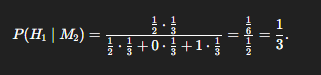

## Key Distributions - Gaussian, Poisson, Maxwell-Boltzmann

In thermal physics, we often study systems comprised of an enormous number of particles. Instead of tracking the exact trajectories of each particle exhaustively, we rely on probability distributions which describe the typical behaviour of the system as a whole. The Gaussian, Poisson, and Maxwell-Boltzmann distributions are especially important because they each capture a common pattern observed in physical processes present in thermodynamics. Understanding these distributions helps in explaining how microscopic randomness produces the macroscopic behaviour we observe. Consider this an introduction to these key distributions, as we will go through them in more detail within Chapter 6.

### Gaussian (Normal) Distribution

A continuous, bell-shaped probability density function:

$$
f(x; \mu, \sigma)=\frac{1}{\sqrt{2\pi}\, \sigma}\exp\! \left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

The mean and variance are $\langle x\rangle=\mu$ and $\sigma^2$.
By the Central Limit Theorem, the sum or average of many independent random variables tends toward a Gaussian distribution, regardless of the original shape.

The Gaussian distribution is relevant because many physical quantities arise from the combined effect of many small, often random contributions. When these contributions add together, their overall behaviour tends to form a Gaussian distribution with its characteristic bell-shaped curve. This is why energy fluctuations, measurement noise, and small variations in macroscopic observables often follow a normal distribution. In practice, the Gaussian serves as a “default” model for fluctuations in thermal systems, reflecting how microscopic randomness smooths out into predictable macroscopic behaviour. An extremely common type of Gaussian distribution is the *standard normal distribution*, which is when $\mu = 0$ and $\sigma = 1$.

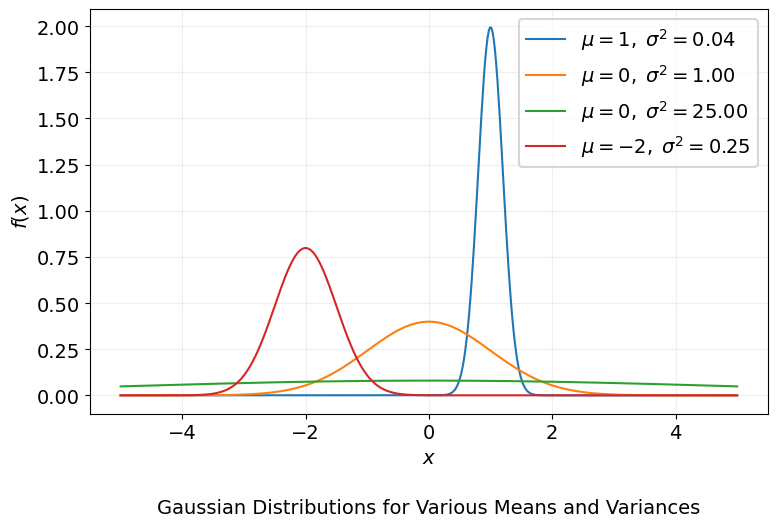

In [69]:
def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2*np.pi)*sigma) * np.exp(-(x - mu)**2 / (2*sigma**2))

x = np.linspace(-5, 5, 500)

params = [
    (1, 0.2),
    (0, 1.0),
    (0, 5.0),
    (-2, 0.5)
]

plt.figure(figsize=(8, 5))

for mu, sigma in params:
    y = gaussian(x, mu, sigma)
    plt.plot(x, y, label=f"$\\mu={mu},\\;\\sigma^2={sigma**2:.2f}$")


plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(x=0.55, y=-0.05, s=f"Gaussian Distributions for Various Means and Variances", ha='center')

plt.show()

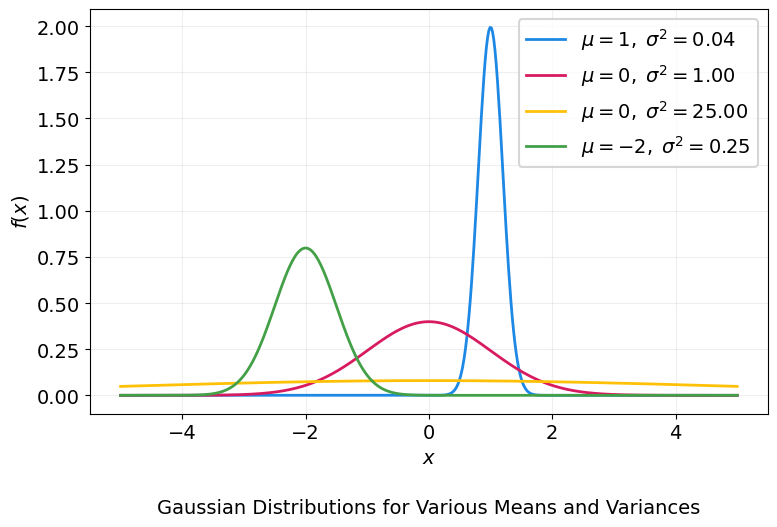

In [73]:
CUD_COLORS = ["#1E88E5", "#D81B60", "#FFC107", "#43A047"]

def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2*np.pi)*sigma) * np.exp(-(x - mu)**2 / (2*sigma**2))

x = np.linspace(-5, 5, 500)

params = [
    (1, 0.2),
    (0, 1.0),
    (0, 5.0),
    (-2, 0.5)
]

plt.figure(figsize=(8, 5))

# Cycle through colours
for (mu, sigma), col in zip(params, CUD_COLORS):
    y = gaussian(x, mu, sigma)
    plt.plot(
        x, y,
        color=col,
        linewidth=2,
        label=f"$\\mu={mu},\\;\\sigma^2={sigma**2:.2f}$"
    )

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(
    x=0.55, y=-0.05,
    s="Gaussian Distributions for Various Means and Variances",
    ha='center'
)

plt.show()


## Poisson Distribution

A discrete distribution describing the number of rare, independent events occurring in a fixed interval:

$$
P(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k! }, \qquad k=0, 1, 2, \dots
$$

The mean and variance are both $\langle k\rangle=\lambda$.
It arises as the limit of the binomial distribution for large $n$, small $p$, with $\lambda = np$. The parameter, $\lambda$, can be thought of as a rate parameter, controlling the frequency of occurrence for whatever event it is being used to describe.

The Poisson distribution is important whenever we count events that occur randomly and independently. In thermal physics, this becomes especially relevant when we measure how often certain microscopic events occur over time; for example, molecular collisions, detections of radioactive decay events, or the number of particles crossing a surface. These processes involve random events happening at an approximately steady average rate, which makes the Poisson distribution well-suited to describing them. It helps us understand the size of fluctuations in these counting experiments and explains the origin of *shot noise*: the unavoidable statistical variations in the number of detected events, even when the average rate stays constant.

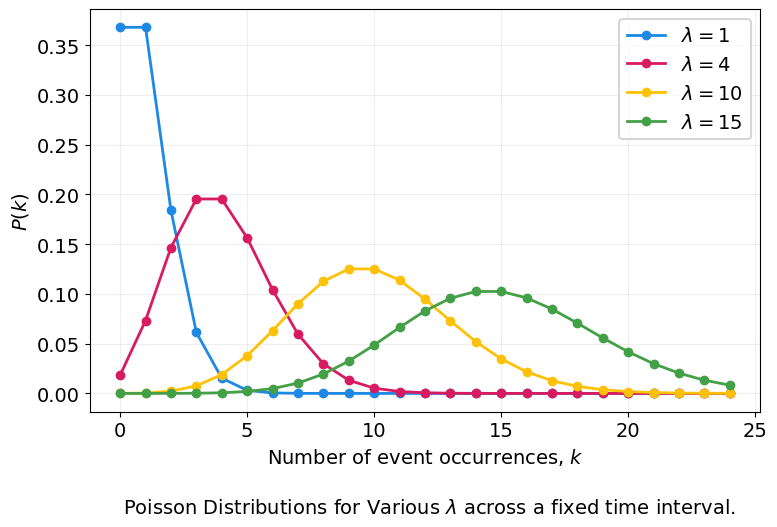

In [77]:
from scipy.stats import poisson

# Material Design palette
MATERIAL_COLORS = ["#1E88E5", "#D81B60", "#FFC107", "#43A047"]

ks = np.arange(0, 25)
lambdas = [1, 4, 10, 15]

plt.figure(figsize=(8, 5))

for lam, col in zip(lambdas, MATERIAL_COLORS):
    y = poisson.pmf(ks, lam)
    plt.plot(
        ks, y,
        marker='o',
        color=col,
        linewidth=2,
        label=f"$\\lambda={lam}$"
    )

plt.xlabel("Number of event occurrences, $k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(x=0.55, y=-0.05, s="Poisson Distributions for Various $\\lambda$ across a fixed time interval.", ha='center')

plt.show()

## Maxwell–Boltzmann Speed Distribution (3D Ideal Gas)

The Maxwell-Boltzmann distribution is a particular probability distribution named after James Clerk Maxwell and Ludwig Boltzmann, and was first defined for describing particle speeds in idealized gases.

$$
f(v; T, m)=4\pi\! \left(\frac{m}{2\pi k_B T}\right)^{3/2} v^2 \exp\! \left(-\frac{m v^2}{2k_B T}\right), \qquad v\ge 0
$$

The Maxwell–Boltzmann distribution plays a central role in kinetic theory because it describes the spread of particle speeds in a classical ideal gas. It shows that, at a given temperature, some particles move slowly while others move very fast, and it gives precise predictions for the most probable speed, the average speed, and the rms speed. These predictions feed directly into calculations of pressure, diffusion, heat transfer, and collision rates. In essence, this distribution connects random molecular motion to the observable properties of gases.

Key quantities:

- Most probable speed: $v_p=\sqrt{\frac{2k_B T}{m}}$
- Mean speed: $\langle v\rangle=\sqrt{\frac{8k_B T}{\pi m}}$
- RMS speed: $v_{\mathrm{rms}}=\sqrt{\frac{3k_B T}{m}}$

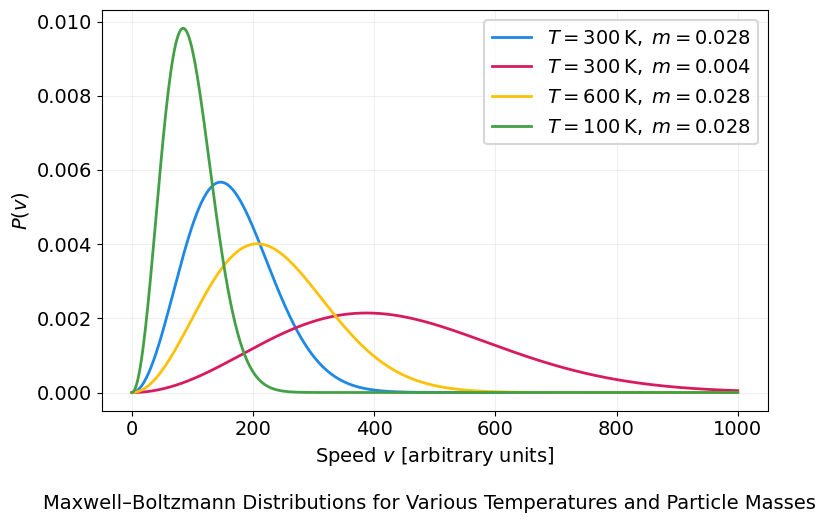

In [75]:
# Material Design palette
MATERIAL_COLORS = ["#1E88E5", "#D81B60", "#FFC107", "#43A047"]

def maxwell_boltzmann(v, T, m, kB=1):
    return 4*np.pi * (m/(2*np.pi*kB*T))**1.5 * v**2 * np.exp(-m*v**2/(2*kB*T))

v = np.linspace(0, 1000, 500)

params = [
    (300, 0.028),   # Room temp, nitrogen-like
    (300, 0.004),   # Light molecule
    (600, 0.028),   # Higher temperature
    (100, 0.028)    # Lower temperature
]

plt.figure(figsize=(8, 5))

for (T, m), col in zip(params, MATERIAL_COLORS):
    y = maxwell_boltzmann(v, T, m)
    plt.plot(
        v, y,
        color=col,
        linewidth=2,
        label=f"$T={T}\\,\\text{{K}},\\;m={m}$"
    )

plt.xlabel("Speed $v$ [arbitrary units]")
plt.ylabel("$P(v)$")
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()

plt.figtext(
    x=0.55,
    y=-0.04,
    s="Maxwell–Boltzmann Distributions for Various Temperatures and Particle Masses",
    ha='center'
)

plt.show()